In [1]:
## 1. load dataset
## 2. load model
## 3. load pretrained model checkpoint
## 4. build a new classifier to finetune the model
## 5. train the model
## 6. evaluate the model

In [2]:
import pandas as pd
healthy_subject_pd = pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/ids_determined_using_ukb23767_45078_self_reported_20002_fields_with_paired_ECGCMR.csv')
healthy_subject_pd.eid = healthy_subject_pd.eid.astype(str)

In [3]:
HF_subject_pd = pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/HF_record_found_in_algorithmly_defined_I50_ICD10_ICD9_with_source_dates_ecg_cmr_paired.csv')
HF_subject_pd.head(5)
HF_subject_pd.eid = HF_subject_pd.eid.astype(str)

In [8]:
## get a list of ecg subjects with heart failure: (prevalent vs incident heart failure)
path_to_paired_ecg_cmr_records = '/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB/ecg_id_ecg_cmr_date_path.csv'
paired_eid_df = pd.read_csv(path_to_paired_ecg_cmr_records,encoding='gbk')
paired_eid_df.eid = paired_eid_df.eid.apply(str)

# ## make a copy of this file to the current directory
# import shutil
# shutil.copy(path_to_paired_ecg_cmr_records, '/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB')



In [9]:
## using the ECG date and the HF date to determine the incident HF and prevalent HF
HF_subject_pd_with_ECG_date = HF_subject_pd.merge(paired_eid_df, on='eid', how='inner')
print(len(HF_subject_pd_with_ECG_date))
HF_subject_pd_with_ECG_date.head(5)


581


,eid,HF-date,source,i50-source_code,source.1,ecg_date,ecg_file_path,cmr_date,cmr_file_path,Genetic sex
0,1000532,2018-07-04,40.0,40.0,Hospital admissions data only,2017-3-4,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2017-03-04,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,0.0
1,1010407,2018-09-29,40.0,40.0,Hospital admissions data only,2015-8-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2015-08-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,0.0
2,1018992,2018-06-06,40.0,40.0,Hospital admissions data only,2022-3-3,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2022-03-03,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
3,1035896,2019-10-13,40.0,40.0,Hospital admissions data only,2014-8-16,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2014-08-16,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
4,1054055,2019-08-16,40.0,40.0,Hospital admissions data only,2018-3-7,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2018-03-07,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0


In [10]:
## incident HF: HF date > ECG date
## prevalent HF: HF date <= ECG date
incident_HF_subject_pd = HF_subject_pd_with_ECG_date[HF_subject_pd_with_ECG_date["HF-date"] > HF_subject_pd_with_ECG_date.ecg_date]
## drop the duplicated subjects
incident_HF_subject_pd = incident_HF_subject_pd.drop_duplicates(subset=['eid'], keep='first')
print("incident HF: ", len(incident_HF_subject_pd))
incident_HF_subject_pd.to_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/incident_HF.csv", index=False)
incident_HF_subject_pd.head(5)
## to the current directory
import shutil
shutil.copy("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/incident_HF.csv", '/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB')

incident HF:  261


'/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB/incident_HF.csv'

In [11]:
## prevalent HF: HF date <= ECG date
prevalent_HF_subject_pd = HF_subject_pd_with_ECG_date[HF_subject_pd_with_ECG_date["HF-date"] <= HF_subject_pd_with_ECG_date.ecg_date]
print("prevalent HF: ", len(prevalent_HF_subject_pd))
prevalent_HF_subject_pd.to_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/prevalent_HF.csv", index=False)
prevalent_HF_subject_pd.head(5)

prevalent HF:  320


,eid,HF-date,source,i50-source_code,source.1,ecg_date,ecg_file_path,cmr_date,cmr_file_path,Genetic sex
2,1018992,2018-06-06,40.0,40.0,Hospital admissions data only,2022-3-3,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2022-03-03,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
5,1055846,2013-02-22,40.0,40.0,Hospital admissions data only,2019-1-9,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2019-01-09,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
7,1066856,2017-06-25,40.0,40.0,Hospital admissions data only,2019-10-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2019-10-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
8,1070060,1999-09-21,30.0,30.0,Primary care only,2017-2-10,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2017-02-10,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
11,1090137,2008-07-01,50.0,50.0,Self-report only,2018-3-6,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2018-03-06,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,0.0


In [12]:
## do the same to MI subjects
MI_subject_pd = pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/MI_record_found_in_algorithmly_defined_I21_42000_with_source_dates_ecg_cmr_paired.csv')
MI_subject_pd.head(5)
MI_subject_pd.eid = MI_subject_pd.eid.astype(str)
## drop the duplicated subjects
MI_subject_pd = MI_subject_pd.drop_duplicates(subset=['eid'], keep='first')
## rename the column name
MI_subject_pd.rename(columns={'42000-0.0': 'MI_date'}, inplace=True)

In [13]:
## join the table with ECG date
MI_subject_pd_with_ECG_date = MI_subject_pd.merge(paired_eid_df, on='eid', how='inner')
print(len(MI_subject_pd_with_ECG_date))
MI_subject_pd_with_ECG_date.head(5)

1366


,eid,MI_date,42001-0.0,type,source_code,source,ecg_date,ecg_file_path,cmr_date,cmr_file_path,Genetic sex
0,1007100,2012-10-08,11.0,MI,NaN,NaN,2017-10-6,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2017-10-06,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
1,1010407,2018-09-29,21.0,MI,21.0,Death register and other source(s),2015-8-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2015-08-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,0.0
2,1011223,2017-05-30,11.0,MI,NaN,NaN,2018-4-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2018-04-20,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
3,1013662,2005-10-11,11.0,MI,NaN,NaN,2015-8-11,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2015-08-11,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0
4,1025631,2008-06-13,21.0,MI,21.0,Death register and other source(s),2017-10-10,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,2017-10-10,/mnt/netshare/Biomedia/ibme_biomedia/Projects_...,1.0


In [14]:
## incident MI: MI date > ECG date
## prevalent MI: MI date <= ECG date
incident_MI_subject_pd = MI_subject_pd_with_ECG_date[MI_subject_pd_with_ECG_date["MI_date"] > MI_subject_pd_with_ECG_date.ecg_date]
print("incident MI: ", len(incident_MI_subject_pd))
incident_MI_subject_pd.to_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/incident_MI.csv", index=False)


incident MI:  321


In [15]:
## prevalent MI: MI date <= ECG date
prevalent_MI_subject_pd = MI_subject_pd_with_ECG_date[MI_subject_pd_with_ECG_date["MI_date"] <= MI_subject_pd_with_ECG_date.ecg_date]
print("prevalent MI: ", len(prevalent_MI_subject_pd))
## drop the duplicated subjects
prevalent_MI_subject_pd = prevalent_MI_subject_pd.drop_duplicates(subset=['eid'], keep='first')
prevalent_MI_subject_pd.to_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/prevalent_MI.csv", index=False)


prevalent MI:  1045


In [16]:
## collect the subjects with MI and save it to numpy array:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append("../..")
from multi_modal_heart.ECG.ecg_utils import extract_ECG_data_from_xml_file, contains_full_lengthwave_in_xml,get_ecg_data_from_xml_file,contains_medianwave_in_xml
prevalent_MI_subject_pd = pd.read_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/prevalent_MI.csv")
f_path = prevalent_MI_subject_pd.ecg_file_path.values[0]
print(f_path)
ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=500, if_median=True, return_type="numpy")
print(ecg_data.shape)
## zscore
from scipy.stats import zscore
ecg_data = zscore(ecg_data, axis=1)

/mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1007100_20205_2_0.xml
(12, 600)


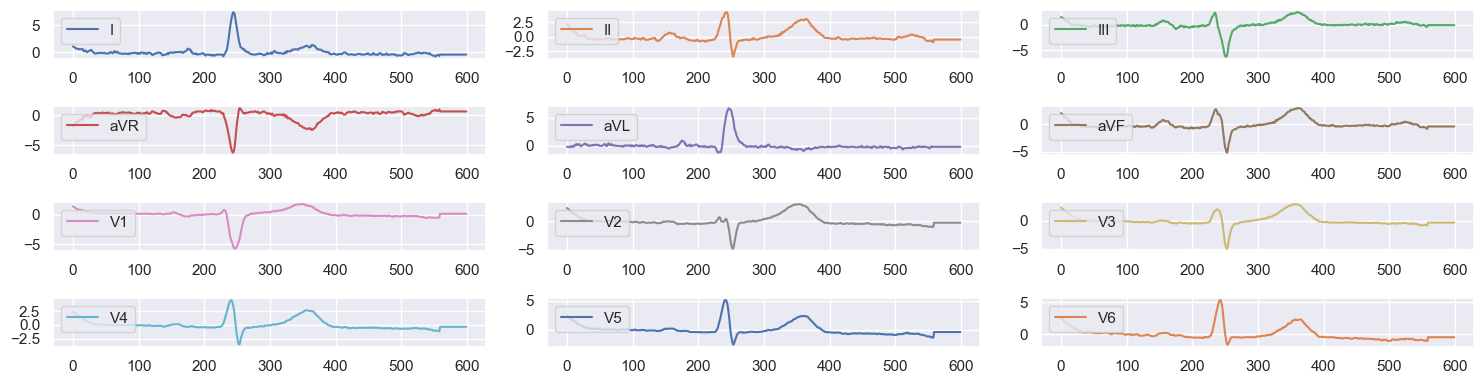

(<module 'matplotlib.pyplot' from '/home/engs2522/local/conda/envs/pytorch3d/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [17]:
from multi_modal_heart.ECG.ecg_utils import arraytodataframe, plot_ecg_frame
y_df = arraytodataframe(ecg_data)
plot_ecg_frame(y_df, figsize=(15,4))

In [18]:
plot_overlapped_multi_lead_signals(ecg_data)

NameError: name 'plot_overlapped_multi_lead_signals' is not defined

In [19]:
## extract median ECG data with MI subjects to evaluate the model
## 1. data 1: extract median ECG data from xml file
ecg_path_list =  prevalent_MI_subject_pd.ecg_file_path.values.tolist()
ecg_id_list = prevalent_MI_subject_pd.eid.values.tolist()

## save list to numpy array
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/ecg_id_list.npy", ecg_id_list)

# print(ecg_id_list[0], ecg_path_list[0])
# get the median ecg data
not_found_median_data = []
ecg_data_list= []
median_eid_list=[]
count = 0
for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(eid, f_path)
    if contains_medianwave_in_xml(f_path):
        
        median_eid_list.append(eid)
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=500, if_median=True, return_type="numpy")
        ecg_data_list.append(ecg_data)
        ## save original ecg xml into current folder
        ## data: 
        if not os.path.exists("/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB/UKB_MI"):
            os.makedirs("/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB/UKB_MI") 
        ## new file name:
        new_f_path = "/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB/UKB_MI/"+str(count)+'_'+str(eid)+".xml"
        count = count+1
        shutil.copy(f_path, new_f_path)
    else:
        not_found_median_data.append(eid)
        print("not found median data in xml file: ", f_path)



1007100 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1007100_20205_2_0.xml
1011223 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1011223_20205_2_0.xml
1013662 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1013662_20205_2_0.xml
1025631 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1025631_20205_2_0.xml
1028018 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1028018_20205_2_0.xml
1029628 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1029628_20205_2_0.xml
1030386 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1030386_20205_2_0.xml
1031970 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1031970_20205_2_0.xml
1051753 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1051753_20205_2_0.xml
1058893 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2

In [20]:
print("not found median data in xml file: ", len(not_found_median_data))
not_found_median_data

not found median data in xml file:  1


[5590293]

In [6]:
batched_ecg_median_wave = np.stack(ecg_data_list, axis=0)

print(batched_ecg_median_wave.shape)
## save to the numpy array
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/batched_ecg_median_wave.npy", batched_ecg_median_wave)
## save the median ecg id to the numpy array into the disk as well
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/median_eid_list.npy", median_eid_list)

(1044, 12, 600)


In [4]:
## save the full length ecg data
not_found_full_data = []
ecg_data_list= []
sampling_rate =100
if_median = False
ecg_path_list =  prevalent_MI_subject_pd.ecg_file_path.values.tolist()
ecg_id_list = prevalent_MI_subject_pd.eid.values.tolist()

for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(i, f_path)
    if contains_full_lengthwave_in_xml(f_path):
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=sampling_rate, if_median=False, return_type="numpy")
        print(ecg_data.shape)
        ecg_data_list.append(ecg_data)
    else:
        not_found_full_data.append(eid)
        print("not found full data in xml file: ", f_path)

0 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1007100_20205_2_0.xml
(12, 1000)
1 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1011223_20205_2_0.xml
(12, 1000)
2 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1013662_20205_2_0.xml
(12, 1000)
3 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1025631_20205_2_0.xml
(12, 1000)
4 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1028018_20205_2_0.xml
(12, 1000)
5 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1029628_20205_2_0.xml
(12, 1000)
6 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1030386_20205_2_0.xml
(12, 1000)
7 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1031970_20205_2_0.xml
(12, 1000)
8 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1051753_20205_2_0.xml
(12, 1000)
9 /mnt/net

In [6]:
print("not found full data in xml file: ", len(not_found_full_data))

not found full data in xml file:  0


In [9]:
stacked_full_length_data = np.stack(ecg_data_list, axis=0)
print(stacked_full_length_data.shape)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/batched_ecg_full_wave.npy", stacked_full_length_data)

(1045, 12, 1000)


In [18]:
## extract median ECG data with HF subjects to evaluate the model
## collect the subjects with MI and save it to numpy array:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append("../..")
from multi_modal_heart.ECG.ecg_utils import extract_ECG_data_from_xml_file, contains_full_lengthwave_in_xml,get_ecg_data_from_xml_file,contains_medianwave_in_xml
prevalent_HF_subject_pd = pd.read_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/prevalent_HF.csv")
f_path = prevalent_HF_subject_pd.ecg_file_path.values[0]
print(f_path)
ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=500, if_median=True, return_type="numpy")
print(ecg_data.shape)

/mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1018992/xml/1018992_20205_2_0.xml
(12, 600)


In [19]:
ecg_path_list =  prevalent_HF_subject_pd.ecg_file_path.values.tolist()
ecg_id_list = prevalent_HF_subject_pd.eid.values.tolist()
sampling_rate =500
if_median = True
ecg_data_list = []
not_found_median_data = []
eid_list = []
for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(i, f_path)
    if contains_medianwave_in_xml(f_path):
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=sampling_rate, if_median=if_median, return_type="numpy")
        print(ecg_data.shape)
        ecg_data_list.append(ecg_data)
        eid_list.append(eid)
    else:
        not_found_median_data.append(eid)
        print("not found full data in xml file: ", f_path)


0 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1018992/xml/1018992_20205_2_0.xml
(12, 600)
1 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1055846_20205_2_0.xml
(12, 600)
2 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1066856/xml/1066856_20205_2_0.xml
(12, 600)
3 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1070060_20205_2_0.xml
(12, 600)
4 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1090137_20205_2_0.xml
(12, 600)
5 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1096247/xml/1096247_20205_2_0.xml
(12, 600)
6 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1098163_20205_2_0.xml
(12, 600)
7 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1099680_20205_2_0.xml
(12, 600)

In [20]:
## save list to numpy array
hf_median_data = np.stack(ecg_data_list, axis=0)

print(hf_median_data.shape)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/batched_ecg_median_wave.npy", hf_median_data)

## save the eid list
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/median_eid_list.npy", eid_list)

(318, 12, 600)


In [12]:
sampling_rate =100.0
if_median = False
ecg_data_list = []
not_found_full_data = []
for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(i, f_path)
    if contains_full_lengthwave_in_xml(f_path):
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=sampling_rate, if_median=if_median, return_type="numpy")
        print(ecg_data.shape)
        ecg_data_list.append(ecg_data)
    else:
        not_found_full_data.append(eid)
        print("not found full data in xml file: ", f_path)


0 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1018992/xml/1018992_20205_2_0.xml
(12, 1000)
1 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1055846_20205_2_0.xml
(12, 1000)
2 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1066856/xml/1066856_20205_2_0.xml
(12, 1000)
3 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1070060_20205_2_0.xml
(12, 1000)
4 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1090137_20205_2_0.xml
(12, 1000)
5 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1096247/xml/1096247_20205_2_0.xml
(12, 1000)
6 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1098163_20205_2_0.xml
(12, 1000)
7 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1099680_20205_2_0.xml
(1

In [13]:
## save list to numpy array
hf_full_data = np.stack(ecg_data_list, axis=0)
print(hf_full_data.shape)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/batched_ecg_full_wave.npy", hf_full_data)



(320, 12, 1000)


In [22]:
## randomly select 320 healthy subjects from the whole dataset
## 1. load the whole dataset
## 2. randomly select 320 subjects
## 3. save the selected subjects to numpy array
paths = os.listdir("/home/engs2522/project/multi-modal-heart/multi_modal_heart/data/UKB/ECG/non_CVD_disease")
eid_list = [id.split("_")[0] for id in paths if id.endswith(".xml")]
print(len(eid_list))

healthy_subject_pd = pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/ids_determined_using_ukb23767_45078_self_reported_20002_fields_with_paired_ECGCMR.csv')
healthy_subject_pd.eid = healthy_subject_pd.eid.astype(str)
## remove rows with duplicate eids
healthy_subject_pd = healthy_subject_pd.drop_duplicates(subset=['eid'], keep='first')
print(len(healthy_subject_pd))
## save it back to csv file
healthy_subject_pd.to_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/ids_determined_using_ukb23767_45078_self_reported_20002_fields_with_paired_ECGCMR.csv', index=False)


199
40300


In [23]:
filterd_healthy_subject_id = []
for id in eid_list:
    if id not in healthy_subject_pd.eid.values:
        print("warning: this is not a healthy subject", id)
    else:filterd_healthy_subject_id.append(id)

In [18]:
len(filterd_healthy_subject_id)

194

In [32]:
## for the remaining subjects, randomly select 320-194 subjects
total_health_subjects = 1045
healthy_pool_id_list= healthy_subject_pd[~healthy_subject_pd.eid.isin(filterd_healthy_subject_id)].eid.tolist()
len(healthy_pool_id_list)
## double check if there is any subject in the MI or HF dataset
MI_subject_pd = pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/prevalent_MI.csv')
HF_subject_pd = pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/HF/prevalent_HF.csv')
MI_subject_pd.eid = MI_subject_pd.eid.astype(str)
HF_subject_pd.eid = HF_subject_pd.eid.astype(str)

## remove eid from the healthy pool
healthy_pool_id_list = [id for id in healthy_pool_id_list if id not in MI_subject_pd.eid.values]
healthy_pool_id_list = [id for id in healthy_pool_id_list if id not in HF_subject_pd.eid.values]
print (len(healthy_pool_id_list))

39849


In [33]:
import random
random.seed(2021)
random_healthy_subject_id_list = random.sample(healthy_pool_id_list, total_health_subjects-len(filterd_healthy_subject_id))
random_healthy_subject_id_list
final_list = list(set(random_healthy_subject_id_list+filterd_healthy_subject_id))
print(len(final_list))
healthy_subject_pd.eid = healthy_subject_pd.eid.astype(str)


1045


In [34]:
selected_healthy_subject = healthy_subject_pd[healthy_subject_pd.eid.isin(final_list)]
selected_healthy_subject.to_csv(f"/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/selected_{str(total_health_subjects)}_healthy_subjects.csv", index=False)
## save the selected healthy subjects with eid list to numpy array
np.save(f"/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/selected_{str(total_health_subjects)}_healthy_subjects_eid_list.npy", final_list)

In [35]:
print(len(selected_healthy_subject))

1045


In [36]:
pd.DataFrame(final_list).to_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/selected_healthy_subject_id_list_1045_need_to_recon_point_meshes.csv", index=False, header=False)

In [100]:
##read the ecg data from selected healthy subject id list
import os
import sys
import numpy as np
import pandas as pd
sys.path.append("../..")
from multi_modal_heart.ECG.ecg_utils import extract_ECG_data_from_xml_file, contains_full_lengthwave_in_xml,get_ecg_data_from_xml_file,contains_medianwave_in_xml
df = pd.read_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/selected_1045_healthy_subjects.csv", encoding='gbk')

In [101]:
df.eid=df.eid.astype(str)
selected_healthy_subject_id_list=df.eid.values.tolist()
print(len(selected_healthy_subject_id_list))
selected_healthy_subject_id_list[:5]
## get a list of ecg subjects with heart failure: (prevalent vs incident heart failure)
paired_eid_df = pd.read_csv("/mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/log/ecg_id_ecg_cmr_date_path.csv",encoding='gbk')
paired_eid_df.eid = paired_eid_df.eid.apply(str)

1045


In [102]:
healthy_paired_eid = paired_eid_df[paired_eid_df.eid.isin(selected_healthy_subject_id_list)]
healthy_paired_eid.to_csv("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/selected_1045_healthy_subjects_paired_ecg_cmr.csv", index=False)

In [103]:
## extract median ECG data with healthy subjects to evaluate the model
ecg_path_list =  healthy_paired_eid.ecg_file_path.values.tolist()
ecg_id_list = healthy_paired_eid.eid.values.tolist()
sampling_rate =100.0
if_median = False
ecg_data_list = []
not_found_full_data = []
for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(i, f_path)
    if contains_full_lengthwave_in_xml(f_path):
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=sampling_rate, if_median=if_median, return_type="numpy")
        print(ecg_data.shape)
        ecg_data_list.append(ecg_data)
    else:
        not_found_full_data.append(eid)
        print("not found full data in xml file: ", f_path)


0 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1001657/xml/1001657_20205_2_0.xml
(12, 1000)
1 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1003180/xml/1003180_20205_2_0.xml
(12, 1000)
2 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1003277_20205_2_0.xml
(12, 1000)
3 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1008856_20205_2_0.xml
(12, 1000)
4 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1012912_20205_2_0.xml
(12, 1000)
5 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1026481/xml/1026481_20205_2_0.xml
(12, 1000)
6 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/temp/ECG/1032749/xml/1032749_20205_2_0.xml
(12, 1000)
7 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Bioba

In [104]:
## save list to numpy array
healthy_full_data = np.stack(ecg_data_list, axis=0)
print(healthy_full_data.shape)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/batched_ecg_full_wave_1045.npy", healthy_full_data)

(1045, 12, 1000)


In [2]:
## extract median ECG data with healthy subjects to evaluate the model
sampling_rate =500.0
if_median = True
ecg_data_list = []
not_found_median_data = []
for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(i, f_path)
    if contains_medianwave_in_xml(f_path):
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=sampling_rate, if_median=if_median, return_type="numpy")
        print(ecg_data.shape)
        ecg_data_list.append(ecg_data)
    else:
        not_found_median_data.append(eid)
        print("not found full data in xml file: ", f_path)


NameError: name 'ecg_id_list' is not defined

In [106]:
## save list to numpy array
healthy_median_data = np.stack(ecg_data_list, axis=0)
print(healthy_median_data.shape)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/non_CVD/batched_ecg_median_wave_1045.npy", healthy_median_data)

(1045, 12, 600)


In [22]:
## prepare ECG data with MI (not having HF) before
import pandas as pd
import os
import sys
import numpy as np
import pandas as pd
sys.path.append("../..")
from multi_modal_heart.ECG.ecg_utils import extract_ECG_data_from_xml_file, contains_full_lengthwave_in_xml,get_ecg_data_from_xml_file,contains_medianwave_in_xml

MI_HF_coxreg_df= pd.read_csv('/home/engs2522/project/multi-modal-heart/multi_modal_heart/toolkits/ukb/non_imaging_information/MI/MI_HF_coxreg_df.csv')
MI_HF_coxreg_df.head(5)
ecg_id_file_path_df = pd.read_csv("/mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/Downloaded_files_and_keys/log/ecg_id_ecg_cmr_date_path.csv",encoding='gbk')
## join the table with ECG date
MI_HF_coxreg_df_with_ECG_date = MI_HF_coxreg_df.merge(ecg_id_file_path_df, on='eid', how='inner')

ecg_path_list =  MI_HF_coxreg_df_with_ECG_date.ecg_file_path.values.tolist()
ecg_id_list = MI_HF_coxreg_df_with_ECG_date.eid.values.tolist()
sampling_rate =500
if_median = True
ecg_data_list = []
not_found_median_data = []
eid_list = []
duration_list = []
y_list = []
status_list = []

for i, (eid, f_path) in enumerate(zip(ecg_id_list,ecg_path_list)):
    print(eid, f_path)
    if contains_medianwave_in_xml(f_path):
        ecg_data = get_ecg_data_from_xml_file(f_path, sampling_rate=sampling_rate, if_median=if_median, return_type="numpy")
        print(ecg_data.shape)
        ## get duration
        time_to_HF = MI_HF_coxreg_df_with_ECG_date.loc[MI_HF_coxreg_df_with_ECG_date.eid==eid, "time_to_HF"].values[0]
        censor_status = MI_HF_coxreg_df_with_ECG_date.loc[MI_HF_coxreg_df_with_ECG_date.eid==eid, "HF_status"].values[0]
        ecg_data_list.append(ecg_data)
        duration_list.append(time_to_HF)
        status_list.append(censor_status)
        eid_list.append(eid)
    else:
        not_found_median_data.append(eid)
        print("not found full data in xml file: ", f_path)


1007100 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1007100_20205_2_0.xml
(12, 600)
1011223 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1011223_20205_2_0.xml
(12, 600)
1013662 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1013662_20205_2_0.xml
(12, 600)
1025631 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1025631_20205_2_0.xml
(12, 600)
1028018 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1028018_20205_2_0.xml
(12, 600)
1029628 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1029628_20205_2_0.xml
(12, 600)
1030386 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1030386_20205_2_0.xml
(12, 600)
1031970 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/ECG/1031970_20205_2_0.xml
(12, 600)
1051753 /mnt/netshare/Biomedia/ibme_biomedia/Projects_2/UK_Biobank_Cardiac/raw/E

In [23]:
## save all list to numpy file
stacked_ecg_data_list = np.stack(ecg_data_list, axis=0)
print(stacked_ecg_data_list.shape)
y_list = np.array(y_list)
duration_list = np.array(duration_list)
status_list = np.array(status_list)
eid_list = np.array(eid_list)

## save to the numpy array
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/tasks/survival_regression/data/batched_ecg_median_wave_MI_with_HF_event.npy", stacked_ecg_data_list)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/tasks/survival_regression/data/e_id_list_MI_with_HF_event.npy", eid_list)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/tasks/survival_regression/data/duration_list_MI_with_HF_event.npy", duration_list)
np.save("/home/engs2522/project/multi-modal-heart/multi_modal_heart/tasks/survival_regression/data/status_list_MI_with_HF_event.npy", status_list)

(919, 12, 600)
